In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import csv file of google stock price
df_train=pd.read_csv('Google_Stock_Price_Train.csv',header=0,parse_dates=[0])

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


In [6]:
df_train.isnull().sum().sort_values(ascending=False)

Volume    0
Close     0
Low       0
High      0
Open      0
Date      0
dtype: int64

In [7]:
df_train.Date.dtypes

dtype('<M8[ns]')

## Data Visualization

### Line plot

In [8]:
df=df_train.copy()

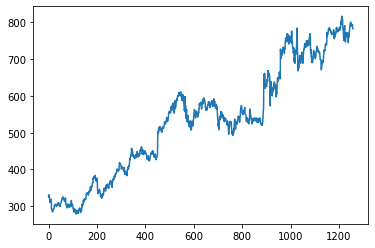

In [9]:
df['Open'].plot()

In [10]:
# now set index of date then plot 
df.index=df['Date']

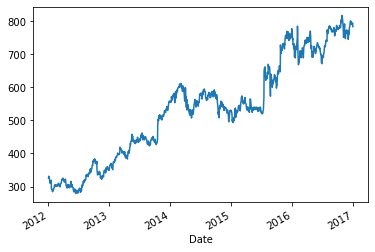

In [11]:
df['Open'].plot()

In [12]:
# Zooming In
df1=df[(df.Date>='2012-01-03') & (df.Date<='2012-12-30')]
df1.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


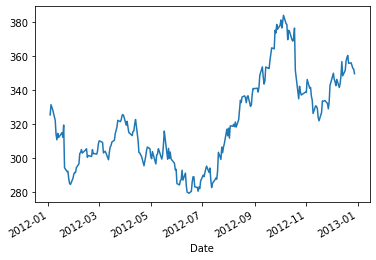

In [13]:
df1.Open.plot()

### Adding Trend Line

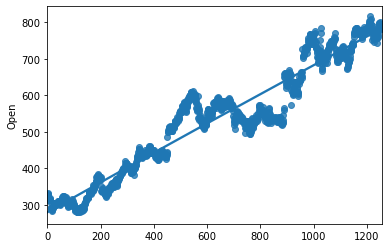

In [14]:
sns.regplot(df_train.index,df.Open,order=2)

### Remove Seasonability

In [15]:
df['year']=df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,year
Date,,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012


In [16]:
df.groupby('year')['Open'].mean()

year
2012    320.195040
2013    440.160119
2014    560.709643
2015    602.057341
2016    743.732460
Name: Open, dtype: float64

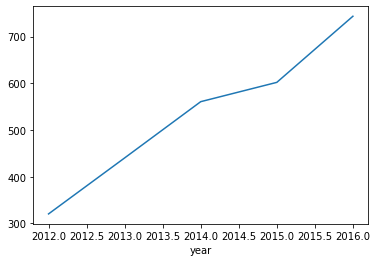

In [17]:
df.groupby('year')['Open'].mean().plot()

### Creating Lag plot

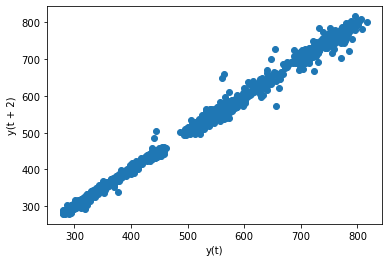

In [18]:
from pandas.plotting import lag_plot
lag_plot(df.Open,lag=2)

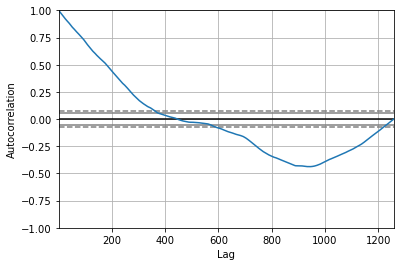

In [19]:
from pandas.plotting import autocorrelation_plot as ap
ap(df.Open)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001897E1C4250>,
      dtype=object)

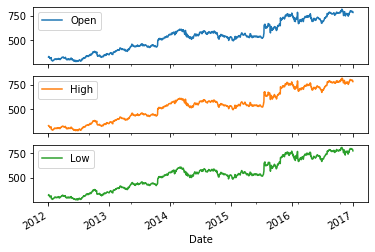

In [20]:
df_train.set_index('Date')[['Open','High','Low']].plot(subplots=True)

In [21]:
# Take input features
X=df_train[['Open','High','Low']]
X

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46
...,...,...,...
1253,790.90,792.74,787.28
1254,790.68,797.86,787.66
1255,793.70,794.23,783.20
1256,783.33,785.93,778.92


In [22]:
X.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [23]:
## Feature Scaling tha Data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_scaled=sc.fit_transform(X)

In [24]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931],
       [0.09701243, 0.09834351, 0.09823458],
       [0.09433366, 0.09251685, 0.09408623],
       ...,
       [0.95725128, 0.95807422, 0.95844067],
       [0.93796041, 0.94257381, 0.95033338],
       [0.93688146, 0.93669113, 0.93421352]])

In [25]:
#Take Output 
Y=X_scaled[:,0]
Y

array([0.08581368, 0.09701243, 0.09433366, ..., 0.95725128, 0.93796041,
       0.93688146])

In [26]:
## Preparation of Time Series Model
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

Using TensorFlow backend.


In [27]:
#for sample
TimeseriesGenerator(X_scaled,Y,length=2,batch_size=10)[0]

(array([[[0.08581368, 0.09640129, 0.09044931],
         [0.09701243, 0.09834351, 0.09823458]],
 
        [[0.09701243, 0.09834351, 0.09823458],
         [0.09433366, 0.09251685, 0.09408623]],
 
        [[0.09433366, 0.09251685, 0.09408623],
         [0.09156187, 0.08881917, 0.08800576]],
 
        [[0.09156187, 0.08881917, 0.08800576],
         [0.07984225, 0.07671765, 0.06106986]],
 
        [[0.07984225, 0.07671765, 0.06106986],
         [0.0643277 , 0.06444805, 0.05697833]],
 
        [[0.0643277 , 0.06444805, 0.05697833],
         [0.0585423 , 0.06033951, 0.06095621]],
 
        [[0.0585423 , 0.06033951, 0.06095621],
         [0.06568569, 0.063589  , 0.06603273]],
 
        [[0.06568569, 0.063589  , 0.06603273],
         [0.06109085, 0.05806114, 0.06089938]],
 
        [[0.06109085, 0.05806114, 0.06089938],
         [0.06639259, 0.06274861, 0.0652561 ]],
 
        [[0.06639259, 0.06274861, 0.0652561 ],
         [0.0614257 , 0.06463481, 0.06190332]]]),
 array([0.09433366, 0.09156187

### Now Split the Data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(X_scaled,Y,test_size=0.25,shuffle=False,random_state=123)

In [29]:
x_train.shape

(943, 3)

In [30]:
x_valid.shape

(315, 3)

In [31]:
train_generator=TimeseriesGenerator(x_train,y_train,length=10,batch_size=32)
valid_generator=TimeseriesGenerator(x_valid,y_valid,length=10,batch_size=32)

In [32]:
num_features=3
max_length=10

### Define LSTM Model

In [144]:
def LSTM_Model(max_length,num_feature):
    from keras.layers import LSTM,Dropout,Dense,LeakyReLU
    from keras import Sequential
    model=Sequential()
    model.add(LSTM(128,input_shape=(max_length,num_features),return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.3))
    model.add(LSTM(128,return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.3))
    model.add(LSTM(64,return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mean_squared_error'])
    return model

In [145]:
model=LSTM_Model(10,3)

In [146]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=4)

In [147]:
model_hist=model.fit(train_generator,validation_data=valid_generator,shuffle=False,callbacks=[early_stopping],epochs=10)

Epoch 1/10
30/30 [==============================] - 5s 182ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 2/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 3/10
30/30 [==============================] - 2s 67ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 5/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


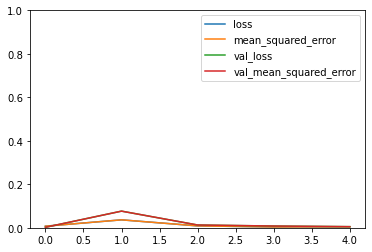

In [148]:
pd.DataFrame(model_hist.history).plot()
plt.gca().set_ylim(0,1)
plt.show()

In [149]:
model.evaluate(valid_generator,verbose=0)

[0.005258943885564804, 0.005258943885564804]

In [203]:
valid_pred=model.predict_generator(valid_generator)
valid_pred.shape

(305, 1)

In [195]:
final_df=pd.concat([pd.DataFrame(valid_pred),pd.DataFrame(x_valid[:,1:][10:])],axis=1)

In [196]:
final_df.shape

(305, 3)

In [197]:
rev_df=sc.inverse_transform(final_df)
rev_df

array([[816.81969005, 827.12663511, 812.65932679],
       [817.44039005, 827.30739593, 812.89019473],
       [817.69456821, 827.10220797, 811.39828345],
       [817.85132044, 826.23748725, 811.15868522],
       [818.01137835, 826.42606477, 811.37985282],
       [818.3416925 , 833.48062244, 816.95657448],
       [818.66013086, 832.42048462, 816.93329368],
       [819.00304526, 831.88015631, 817.25243465],
       [819.35115379, 831.81762284, 817.10983975],
       [819.70542705, 832.33352401, 817.78207285],
       [820.11680758, 832.30811978, 817.78595299],
       [820.57502669, 832.66182475, 817.37853898],
       [821.15186673, 832.95788167, 818.23895855],
       [821.94006592, 833.78351896, 818.93544249],
       [822.9472273 , 834.40689955, 819.66975773],
       [824.03754395, 834.00922573, 819.43112953],
       [823.96823382, 833.94082974, 818.69584426],
       [824.14350134, 833.53827049, 818.60563116],
       [824.34248882, 834.55541655, 819.74348026],
       [824.59701514, 834.24274

In [204]:
X_inv=sc.inverse_transform(X_scaled)
X_inv.shape

(1258, 3)

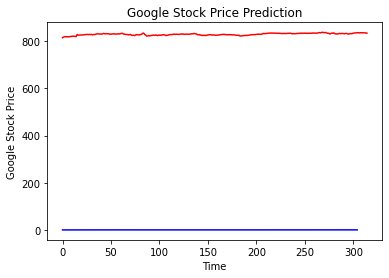

In [205]:
plt.plot(X_inv[943:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(valid_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [206]:
DF=df_train[valid_pred.shape[0]*-1:]

In [207]:
DF.count()

Date      305
Open      305
High      305
Low       305
Close     305
Volume    305
dtype: int64

In [212]:
DF['Prediction_value']=rev_df[:,0]

<ipython-input-212-da4c06bd1f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Prediction_value']=rev_df[:,0]


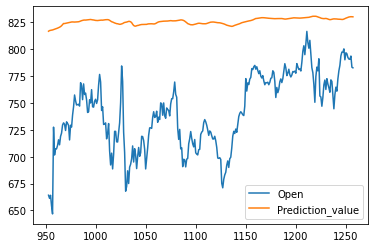

In [214]:
DF[['Open','Prediction_value']].plot()

In [216]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722